In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stats
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import normaltest
from scipy.stats import f_oneway
import numpy
import statsmodels.formula.api as smf


### Descriptive statistics (Περιγραφική στατιστική)

In [3]:
df = pd.read_csv('studentAssessment.csv')
df1 = pd.read_csv('studentInfo.csv')
df2 = pd.read_csv('studentVle.csv')
df3 = pd.read_csv('assessments.csv')
print("________studentAssessment.csv____________")
print(df['score'].describe())
print(df['id_student'].value_counts()) # αρα υπάρχουν 23369 μαθητές για αυτό το αρχείο 
# print(df['score'].value_counts())
print("________________________________________")
print("________________________________________")
print("________studentInfo.csv____________")
print(df1['final_result'].value_counts())
print("________________________________________")
print(df1['region'].value_counts())
print("________________________________________")
print(df1['highest_education'].value_counts())
print("________________________________________")
print(df1['imd_band'].value_counts())
print("________________________________________")
print(df1['age_band'].value_counts())
print("________________________________________")
print(df1['num_of_prev_attempts'].value_counts())
print("________________________________________")
print(df1['studied_credits'].describe())
print(df1['studied_credits'].value_counts())
print("________________________________________")
print(df1['disability'].value_counts())
print("________________________________________")
print(df1['gender'].value_counts())
print("________________________________________")
print(df1['id_student'].value_counts()) # αρα υπάρχουν 28785 μαθητές για αυτό το αρχείο 
print("________________________________________")
print("________________________________________")
print("________studentVle.csv____________")
print(df2['sum_click'].value_counts())


________studentAssessment.csv____________
count    173739.000000
mean         75.799573
std          18.798107
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64
537811     28
554881     26
632074     25
591581     24
570213     24
           ..
2586026     1
500279      1
497872      1
495324      1
2675393     1
Name: id_student, Length: 23369, dtype: int64
________________________________________
________________________________________
________studentInfo.csv____________
Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64
________________________________________
Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales    

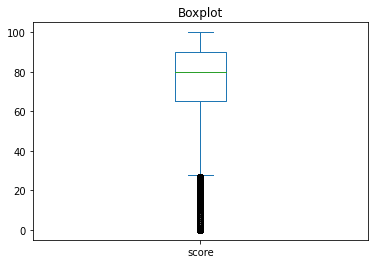

In [4]:
score_plot_box = df['score'].plot.box(title='Boxplot')



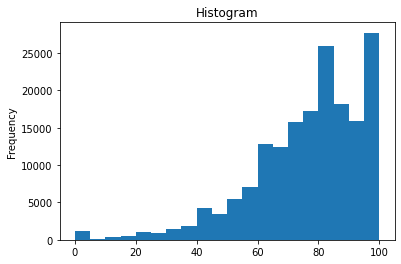

In [5]:
score_hist = df['score'].plot.hist(bins=20, title='Histogram')

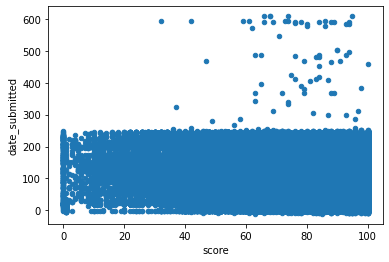

In [6]:

scatterplot = df.plot.scatter(x="score", y="date_submitted")

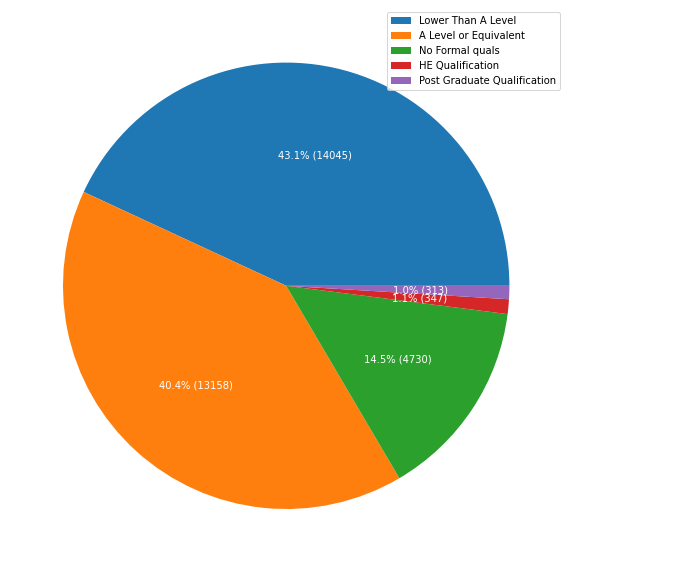

In [7]:
import matplotlib.patches as mpatches
df1['highest_education'].replace([1, 2, 3, 4, 5],
                        ['Lower Than A Level','A Level or Equivalent','No Formal quals','HE Qualification','Post Graduate Qualification'], inplace=True)
total = sum(df1['highest_education'].value_counts())
label = ['Lower Than A Level','A Level or Equivalent','No Formal quals','HE Qualification','Post Graduate Qualification']
count = [df1['highest_education'].value_counts()[0],df1['highest_education'].value_counts()[1],df1['highest_education'].value_counts()[2],df1['highest_education'].value_counts()[3],df1['highest_education'].value_counts()[4]]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}% ({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(10, 16), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(count,labels = label,autopct=lambda pct: func(pct, count),textprops=dict(color="w"))
ax.legend()



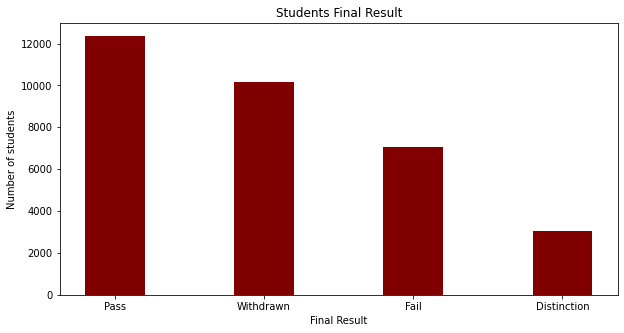

In [8]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(["Pass", "Withdrawn", "Fail", "Distinction"], df1['final_result'].value_counts(), color ='maroon',
        width = 0.4)
 
plt.xlabel("Final Result")
plt.ylabel("Number of students")
plt.title("Students Final Result")
plt.show()

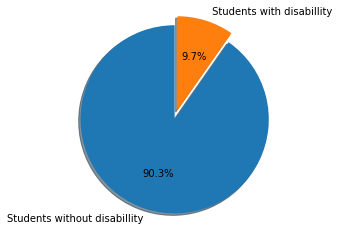

In [9]:
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(df1['disability'].value_counts(), explode=explode, labels=["Students without disabillity"," Students with disabillity"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

In [10]:
print(df.corr(method='pearson'))
print("________________________________________________________________________________")
print(df1.corr(method='pearson'))

                id_assessment  id_student  date_submitted  is_banked     score
id_assessment        1.000000   -0.015995        0.139480  -0.013150  0.072495
id_student          -0.015995    1.000000       -0.006761   0.002059  0.024149
date_submitted       0.139480   -0.006761        1.000000  -0.172478 -0.033893
is_banked           -0.013150    0.002059       -0.172478   1.000000 -0.008149
score                0.072495    0.024149       -0.033893  -0.008149  1.000000
________________________________________________________________________________
                      id_student  num_of_prev_attempts  studied_credits
id_student              1.000000              0.011473        -0.003868
num_of_prev_attempts    0.011473              1.000000         0.181729
studied_credits        -0.003868              0.181729         1.000000


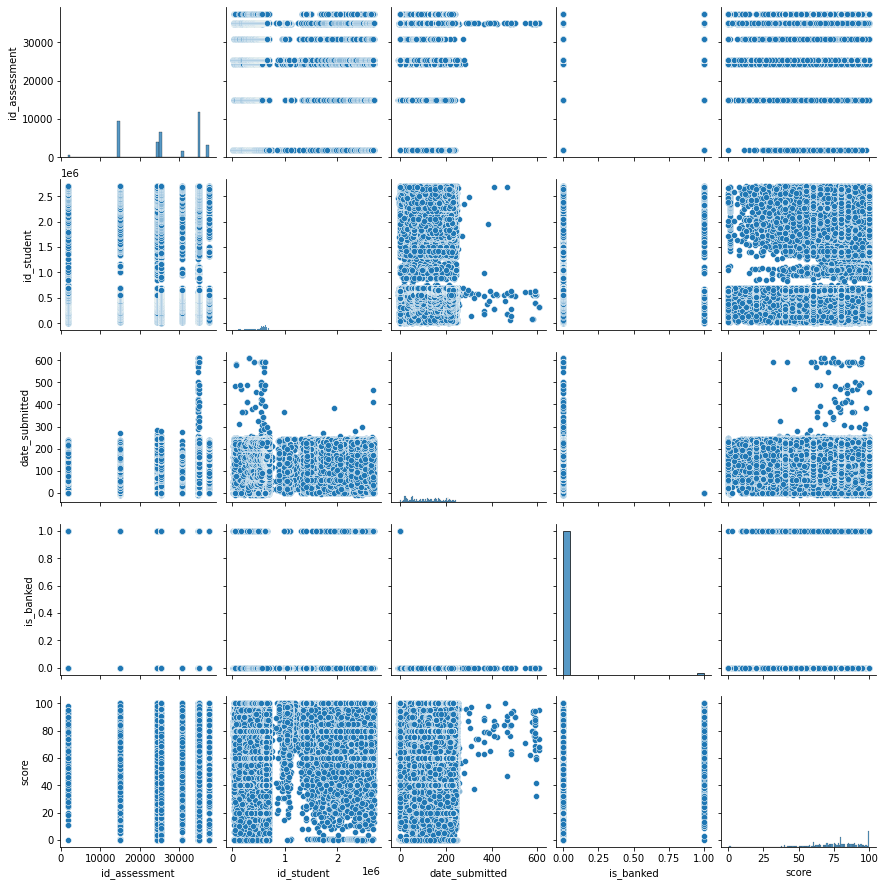

In [11]:
p = sn.pairplot(df)

### Έλεγχος υποθέσεων (Hypothesis testing) Τest 

In [12]:
g = df1.groupby('disability')
abil_yes = g.get_group('Y')# όλα τα id(μαθητές) τα οποία έχουν disability yes
abil_no = g.get_group('N')# όλα τα id(μαθητές) τα οποία έχουν disability no
no = df[['id_student','score']][df['id_student'].isin(abil_no['id_student'])] #επιλέγει από το αρχείο student Assesment όλα τα id (μαθητές) που το  disability no  και εμφανίζει το id && score τους 
yes = df[['id_student','score']][df['id_student'].isin(abil_yes['id_student'])]#επιλέγει από το αρχείο student Assesment όλα τα id (μαθητές) που το  disability yes και εμφανίζει id && score τους


# για κάθε μαθητή με disability no παίρνει το μέσο όρο των εργασιών του,dropna() αφαιρεί την Nan τιμές 
result_yes_abil = yes.groupby(['id_student'])['score'].mean().dropna() 
print('Disability (Yes or No)')
# για κάθε μαθητή με disability yes παίρνει το μέσο όρο των εργασιών του,dropna() αφαιρεί την Nan τιμές 
result_no_abil = no.groupby(['id_student'])['score'].mean().dropna() 
print("________________________________________________________________________________")

# Check for Normality
print("\nCheck Normality")
print('Disability Yes (size = 2142) '+ str(stats.shapiro(result_yes_abil))) # δεν πληροί το κριτήριο κανονικότητας (κανονική κατανομή)
print('Disability No (size = 21209) '+ str(normaltest(result_no_abil))) # δεν πληροί το κριτήριο κανονικότητας (κανονική κατανομή)


# Check samples for Variance 
t,p = stats.levene(result_yes_abil, result_no_abil)
print("\nCheck samples for Variance")
print(t,p)


t,p = stats.ttest_ind(result_yes_abil,result_no_abil)
print("\nT - test")
print(t,p)


print("________________________________________________________________________________")
print("Test non parametric")

print(stats.mannwhitneyu(result_yes_abil,result_no_abil)) # Mann-Whitney
print(stats.kruskal(result_yes_abil,result_no_abil)) # Kruskal–Wallis test 
print(f_oneway(result_yes_abil,result_no_abil)) #anova 
# The major difference between the Mann-Whitney U and the Kruskal-Wallis H is simply that the latter can accommodate more than two groups

# Μια αλλη υπόθεση ανάλυσης είναι η σπουδες με το Score και μπορούμε να δώσουμε στις σπουδές αριθμιτηκές τιμές αναλογα 1,2,3,4,5 κλπ κλπ

# statistic είτε πολύ μικρό είτε πολύ μεγάλο η πιθανότητα είναι μικρή 








Disability (Yes or No)
________________________________________________________________________________

Check Normality
Disability Yes (size = 2142) ShapiroResult(statistic=0.9449746608734131, pvalue=1.4708173873854741e-27)
Disability No (size = 21209) NormaltestResult(statistic=4752.33904709163, pvalue=0.0)

Check samples for Variance
14.84109655524658 0.00011727136203081141

T - test
-7.762864464346408 8.642920710128286e-15
________________________________________________________________________________
Test non parametric
MannwhitneyuResult(statistic=20363175.0, pvalue=2.5894171127547763e-15)
KruskalResult(statistic=62.55628066247193, pvalue=2.5893821384243922e-15)
F_onewayResult(statistic=60.262064691812306, pvalue=8.64292071012667e-15)


In [13]:
df1['highest_education'].replace([1, 2, 3, 4, 5],
                        ['Lower Than A Level','A Level or Equivalent','No Formal quals','HE Qualification','Post Graduate Qualification'], inplace=True)
score_mean = df[['id_student','score']][df['id_student'].isin(df1['id_student'])].groupby(['id_student'])['score'].mean().dropna() 


educ = df1.groupby('highest_education')

pst_gra = educ.get_group('Post Graduate Qualification')
he = educ.get_group('HE Qualification')
no_formal = educ.get_group('No Formal quals')
a_level = educ.get_group('A Level or Equivalent')
lower_a_level = educ.get_group('Lower Than A Level')

pst_gra = df[['id_student','score']][df['id_student'].isin(pst_gra['id_student'])].groupby(['id_student'])['score'].mean().dropna()
he = df[['id_student','score']][df['id_student'].isin(he['id_student'])].groupby(['id_student'])['score'].mean().dropna()
no_formal = df[['id_student','score']][df['id_student'].isin(no_formal['id_student'])].groupby(['id_student'])['score'].mean().dropna()
a_level = df[['id_student','score']][df['id_student'].isin(a_level['id_student'])].groupby(['id_student'])['score'].mean().dropna()
lower_a_level = df[['id_student','score']][df['id_student'].isin(lower_a_level['id_student'])].groupby(['id_student'])['score'].mean().dropna()

print('Highest Education (Post Graduate Qualification, HE Qualification, No Formal quals, A Level or Equivalent,Lower Than A Level)')
print("________________________________________________________________________________")
print("\nCheck Normality\n")
# Check for Normality
print(normaltest(pst_gra))
print(normaltest(he))
print(normaltest(no_formal))
print(normaltest(a_level))
print(normaltest(lower_a_level))
print("________________________________________________________________________________")

# Conduct the one-way ANOVA AND KRUSKAL
print(str('\n')+str(f_oneway(pst_gra,he,no_formal,a_level,lower_a_level)))
print(stats.kruskal(pst_gra,he,no_formal,a_level,lower_a_level))




Highest Education (Post Graduate Qualification, HE Qualification, No Formal quals, A Level or Equivalent,Lower Than A Level)
________________________________________________________________________________

Check Normality

NormaltestResult(statistic=41.335068929461194, pvalue=1.057313621769445e-09)
NormaltestResult(statistic=864.4960630177611, pvalue=1.892627308348391e-188)
NormaltestResult(statistic=52.94300198301072, pvalue=3.188402872276405e-12)
NormaltestResult(statistic=2208.453699349471, pvalue=0.0)
NormaltestResult(statistic=1857.6505633772438, pvalue=0.0)
________________________________________________________________________________

F_onewayResult(statistic=91.4731099521011, pvalue=2.6401238645397704e-77)
KruskalResult(statistic=406.5729025898331, pvalue=1.0569526237984368e-86)


________________________________________________________________________________
Linear Reggression Sum Click for each student - Mean score for each student



Pearson correlation coefficient(0.1557602680867832, 1.3572671539598108e-126)

LinregressResult(slope=2.0970548945694074, intercept=66.09675869261832, rvalue=0.15576026808678312, pvalue=1.3572671539615836e-126, stderr=0.08707999002679788, intercept_stderr=0.30980729266619544)

slope:    2.09705, intercept:   66.09676
r_value:    0.15576, p_value: 1.3572671539615836e-126
std_err:    0.08708
r-squared (determination coef):    0.02426

________________________________________________________________________________
Polynomial  Reggression Sum Click - Mean score



                            OLS Regression Results                            
Dep. Variable:            score_mean2   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Square

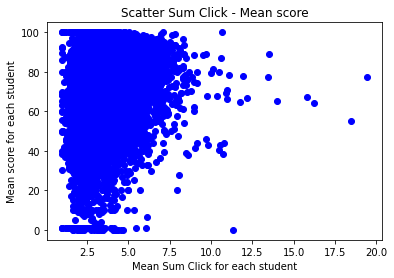

In [14]:
print("________________________________________________________________________________")
print("Linear Reggression Sum Click for each student - Mean score for each student\n\n\n")


sum_click = df2[['id_student','sum_click']][df2['id_student'].isin(df['id_student'])].groupby(['id_student'])['sum_click'].mean().dropna()
score_mean2 = df[['id_student','score']][df['id_student'].isin(df2['id_student'])].groupby(['id_student'])['score'].mean().dropna()
sum_click = sum_click[score_mean2.index.values]
print('Pearson correlation coefficient'+str(pearsonr(score_mean2, sum_click))+ '\n')
res = st.linregress(sum_click, score_mean2)
print(res)
# Results 
print(f"\nslope: {res.slope:10.5f}, intercept: {res.intercept:10.5f}")
print(f"r_value: {res.rvalue:10.5f}, p_value: {res.pvalue}")
print(f"std_err: {res.stderr:10.5f}") 
print(f"r-squared (determination coef): {res.rvalue**2:10.5f}\n")
from scipy.optimize import curve_fit


print("________________________________________________________________________________")
print("Polynomial  Reggression Sum Click - Mean score\n\n\n")
dataframe1 = pd.DataFrame(columns=['score_mean2', 'sum_click'])
dataframe1['sum_click'] = sum_click
dataframe1['score_mean2'] = score_mean2
mymodel = numpy.poly1d(numpy.polyfit(sum_click, score_mean2, 6))
results = smf.ols(formula='score_mean2 ~ mymodel(sum_click)', data=dataframe1).fit()
print(results.summary())


print("________________________________________________________________________________")

print("Non Linear Regression")

def f(sum_click, a, b, c):
    return a * np.exp(b*sum_click) + c
n = len(score_mean2)
popt, pcov = curve_fit(f, sum_click, score_mean2)

# retrieve parameter values
a = popt[0]
b = popt[1]
c = popt[2]
print('Optimal Values')
print('a: ' + str(a))
print('b: ' + str(b))
print('c: ' + str(c))
print(pcov)
# compute r^2
r2 = 1.0-(sum((score_mean2-f(sum_click,a,b,c))**2)/((n-1.0)*np.var(score_mean2,ddof=1)))
print('R^2: ' + str(r2))
print("________________________________________________________________________________")

plt.scatter(sum_click, score_mean2, c ="blue")
plt.title("Scatter Sum Click - Mean score")
plt.xlabel("Mean Sum Click for each student")
plt.ylabel("Mean score for each student")
plt.show()


------------------------------------------------------------------------------------------------------------
Linear Reggression Weight for each assessment - Mean score all students for each assessment



Pearson correlation coefficient(-0.422792576191024, 1.5013089265296475e-09)

LinregressResult(slope=-0.17463013351762083, intercept=77.93773912257997, rvalue=-0.42279257619102406, pvalue=1.501308926529546e-09, stderr=0.027445560870380383, intercept_stderr=0.6298547254464624)



slope:   -0.17463, intercept:   77.93774
r_value:   -0.42279, p_value: 1.501308926529546e-09
std_err:    0.02745
r-squared (determination coef):    0.17875



------------------------------------------------------------------------------------------------------------
Polynomial Regression
                            OLS Regression Results                            
Dep. Variable:             score_mean   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:              

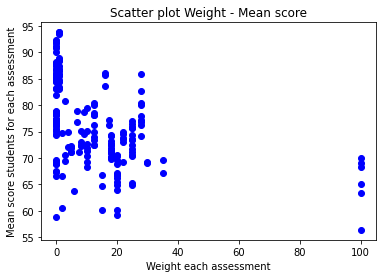

In [15]:
print("------------------------------------------------------------------------------------------------------------")

print("Linear Reggression Weight for each assessment - Mean score all students for each assessment\n\n\n")

weight = df3[['id_assessment','weight']][df3['id_assessment'].isin(df['id_assessment'])]
index_ = weight['id_assessment']
weight.index = index_
weight = weight['weight']

score_mean = df[['id_assessment','score']][df['id_assessment'].isin(df3['id_assessment'])].groupby(['id_assessment'])['score'].mean().dropna()
weight = weight[score_mean.index.values]
print('Pearson correlation coefficient'+str(pearsonr(score_mean, weight))+ '\n')
res = st.linregress(weight, score_mean)
print(res)
print('\n\n')
# Results 
print(f"slope: {res.slope:10.5f}, intercept: {res.intercept:10.5f}")
print(f"r_value: {res.rvalue:10.5f}, p_value: {res.pvalue}")
print(f"std_err: {res.stderr:10.5f}") 
print(f"r-squared (determination coef): {res.rvalue**2:10.5f}\n\n\n")


print("------------------------------------------------------------------------------------------------------------")
print("Polynomial Regression")



dataframe = pd.DataFrame(columns=['score_mean', 'weight'])
dataframe['weight'] = weight
dataframe['score_mean'] = score_mean
mymodel = numpy.poly1d(numpy.polyfit(weight, score_mean, 10))
results = smf.ols(formula='score_mean ~ mymodel(weight)', data=dataframe).fit()
print(results.summary())

print("------------------------------------------------------------------------------------------------------------")
plt.scatter(weight, score_mean, c ="blue")
plt.title("Scatter plot Weight - Mean score")
plt.xlabel("Weight each assessment")
plt.ylabel("Mean score students for each assessment")
plt.show()




In [16]:
from sklearn import preprocessing
from sklearn.metrics import classification_report

#creating labelEncoder
le = preprocessing.LabelEncoder()
#disability_encoded = le.fit_transform(df1['disability'])
region_encoded = le.fit_transform(df1['region'])
highest_education_encoded = le.fit_transform(df1['highest_education'])
ageband_encoded = le.fit_transform(df1['age_band'])
final_result_encoded = le.fit_transform(df1['final_result'])
X = list(zip(highest_education_encoded,ageband_encoded))
y = final_result_encoded


#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print(f'Accuracy of GNB classifier on training set: {gnb.score(X_train, y_train):.2f}')
print(f'Accuracy of GNB classifier on test set: {gnb.score(X_test, y_test):.2f}')

y_pred_train = gnb.predict(X_train)
target_names = ['0','1','2','3']
print(classification_report(y_train, y_pred_train, target_names=target_names))

#disability_encoded,region_encoded,highest_education_encoded,ageband_encoded
#'Pass','Withdrawn','Fail','Distinction'

Accuracy of GNB classifier on training set: 0.39
Accuracy of GNB classifier on test set: 0.40
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2093
           1       0.00      0.00      0.00      4972
           2       0.41      0.74      0.53      8631
           3       0.36      0.36      0.36      7119

    accuracy                           0.39     22815
   macro avg       0.19      0.28      0.22     22815
weighted avg       0.27      0.39      0.31     22815



c:\users\christos\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\christos\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\christos\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
